# **1. Perkenalan Dataset**



"""
Dataset: Titanic - Machine Learning from Disaster
Sumber: Kaggle (https://www.kaggle.com/c/titanic/data)
Jenis: Structured data (CSV)
Ukuran: 891 samples, 12 features
Target: Survival (0 = Tidak, 1 = Ya)
Masalah: Binary Classification
"""

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../titanic_raw/train.csv')
print("Dataset Titanic berhasil dimuat")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n5 data pertama:")
print(df.head())
print("\nInfo dataset:")
print(df.info())

Dataset Titanic berhasil dimuat
Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

5 data pertama:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 1

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# 4.1 Missing Values Analysis
print("=== MISSING VALUES ===")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

=== MISSING VALUES ===
          Missing Count  Missing %
Age                 177  19.865320
Cabin               687  77.104377
Embarked              2   0.224467


In [4]:
# 4.2 Target Distribution (Survived)
print("\n=== TARGET DISTRIBUTION (Survived) ===")
survived_counts = df['Survived'].value_counts()
survived_percent = df['Survived'].value_counts(normalize=True) * 100
print("Count:")
print(survived_counts)
print("\nPercentage:")
print(survived_percent)


=== TARGET DISTRIBUTION (Survived) ===
Count:
Survived
0    549
1    342
Name: count, dtype: int64

Percentage:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


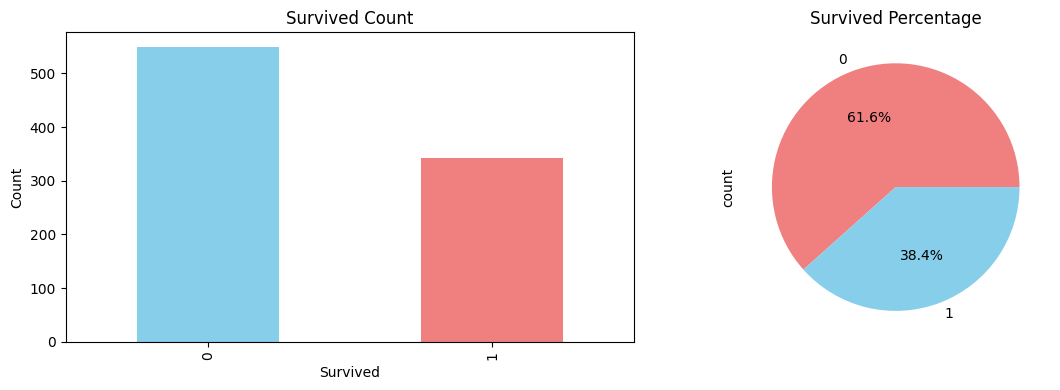

In [5]:
# Visualisasi target
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
survived_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('Survived Count')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Count')

df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=['lightcoral', 'skyblue'])
axes[1].set_title('Survived Percentage')
plt.tight_layout()
plt.show()

In [6]:
# 4.3 Numerical Features Analysis
print("\n=== NUMERICAL FEATURES STATISTICS ===")
num_features = ['Age', 'Fare', 'SibSp', 'Parch']
print(df[num_features].describe())


=== NUMERICAL FEATURES STATISTICS ===
              Age        Fare       SibSp       Parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000


In [7]:
# 4.4 Categorical Features Analysis
print("\n=== CATEGORICAL FEATURES ===")
cat_features = ['Pclass', 'Sex', 'Embarked']
for col in cat_features:
    print(f"\n{col}:")
    print(df[col].value_counts())


=== CATEGORICAL FEATURES ===

Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


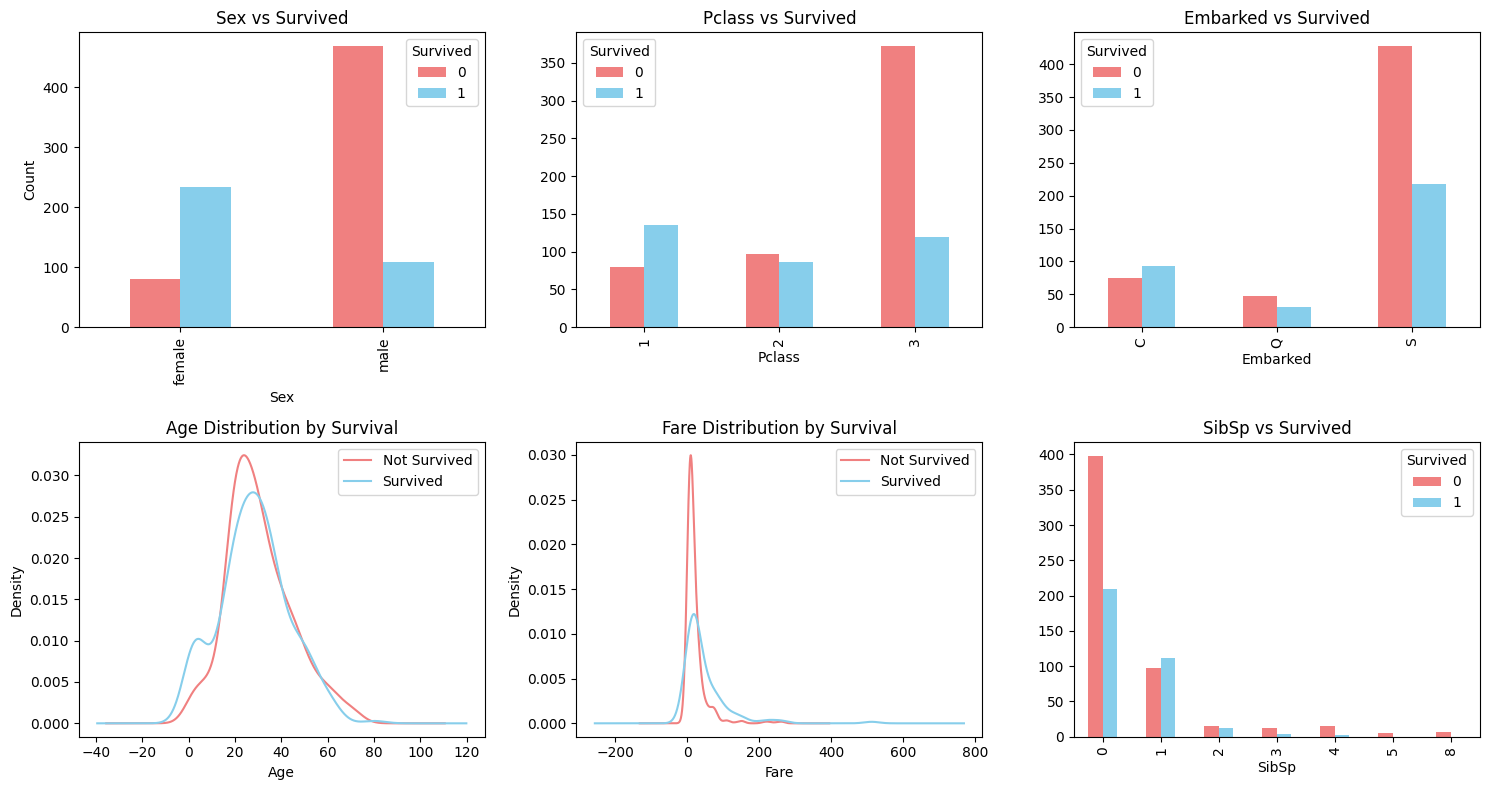

In [8]:
# 4.5 Visualisasi Fitur vs Target
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Sex vs Survived
sex_survived = pd.crosstab(df['Sex'], df['Survived'])
sex_survived.plot(kind='bar', ax=axes[0,0], color=['lightcoral', 'skyblue'])
axes[0,0].set_title('Sex vs Survived')
axes[0,0].set_xlabel('Sex')
axes[0,0].set_ylabel('Count')

# Pclass vs Survived
pclass_survived = pd.crosstab(df['Pclass'], df['Survived'])
pclass_survived.plot(kind='bar', ax=axes[0,1], color=['lightcoral', 'skyblue'])
axes[0,1].set_title('Pclass vs Survived')
axes[0,1].set_xlabel('Pclass')

# Embarked vs Survived
embarked_survived = pd.crosstab(df['Embarked'], df['Survived'])
embarked_survived.plot(kind='bar', ax=axes[0,2], color=['lightcoral', 'skyblue'])
axes[0,2].set_title('Embarked vs Survived')
axes[0,2].set_xlabel('Embarked')

# Age distribution by Survival
df[df['Survived']==0]['Age'].plot(kind='kde', ax=axes[1,0], label='Not Survived', color='lightcoral')
df[df['Survived']==1]['Age'].plot(kind='kde', ax=axes[1,0], label='Survived', color='skyblue')
axes[1,0].set_title('Age Distribution by Survival')
axes[1,0].set_xlabel('Age')
axes[1,0].legend()

# Fare distribution by Survival
df[df['Survived']==0]['Fare'].plot(kind='kde', ax=axes[1,1], label='Not Survived', color='lightcoral')
df[df['Survived']==1]['Fare'].plot(kind='kde', ax=axes[1,1], label='Survived', color='skyblue')
axes[1,1].set_title('Fare Distribution by Survival')
axes[1,1].set_xlabel('Fare')
axes[1,1].legend()

# SibSp vs Survived
sibsp_survived = pd.crosstab(df['SibSp'], df['Survived'])
sibsp_survived.plot(kind='bar', ax=axes[1,2], color=['lightcoral', 'skyblue'])
axes[1,2].set_title('SibSp vs Survived')
axes[1,2].set_xlabel('SibSp')

plt.tight_layout()
plt.show()


=== KORELASI NUMERIK ===
Korelasi dengan Survived:
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


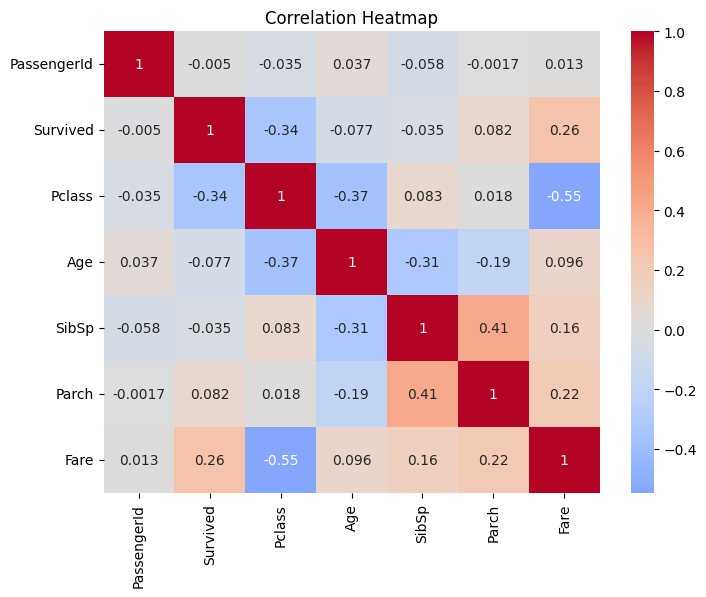


=== FEATURE ENGINEERING IDEAS ===
1. FamilySize = SibSp + Parch + 1
2. IsAlone = 1 if FamilySize == 1 else 0
3. Extract Title from Name (Mr, Mrs, Miss, etc)
4. Cabin letter (hanya huruf pertama dari Cabin)
5. Age groups (Child, Young, Adult, Senior)


In [9]:
# 4.6 Korelasi
print("\n=== KORELASI NUMERIK ===")
# Pilih hanya fitur numerik untuk korelasi
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
print("Korelasi dengan Survived:")
print(correlation['Survived'].sort_values(ascending=False))

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 4.7 Feature Engineering Ideas
print("\n=== FEATURE ENGINEERING IDEAS ===")
print("1. FamilySize = SibSp + Parch + 1")
print("2. IsAlone = 1 if FamilySize == 1 else 0")
print("3. Extract Title from Name (Mr, Mrs, Miss, etc)")
print("4. Cabin letter (hanya huruf pertama dari Cabin)")
print("5. Age groups (Child, Young, Adult, Senior)")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# 5. DATA PREPROCESSING

print("=== PREPROCESSING STARTED ===")

df_processed = df.copy()

=== PREPROCESSING STARTED ===


In [11]:
# 5.1 Handle Missing Values
print("\n1. Handling Missing Values...")

# Age: fill with median grouped by Pclass and Sex
df_processed['Age'] = df_processed.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Cabin: fill dengan 'Unknown' (karena terlalu banyak missing)
df_processed['Cabin'] = df_processed['Cabin'].fillna('Unknown')

# Embarked: fill dengan mode (karena hanya 2 missing)
df_processed['Embarked'] = df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0])

# Cek missing values setelah imputation
print("Missing values setelah imputation:")
print(df_processed.isnull().sum())


1. Handling Missing Values...
Missing values setelah imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
# 5.2 Feature Engineering
print("\n2. Feature Engineering...")

# Family Size
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)

# Extract Title from Name
df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Group rare titles
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Rare', 'Countess': 'Rare', 'Ms': 'Rare', 'Lady': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Rare',
    'Capt': 'Rare', 'Sir': 'Rare'
}
df_processed['Title'] = df_processed['Title'].map(title_mapping)

# Extract Cabin Letter (jika ada)
df_processed['CabinLetter'] = df_processed['Cabin'].str[0]
df_processed['CabinLetter'] = df_processed['CabinLetter'].fillna('Unknown')

# Age Groups
df_processed['AgeGroup'] = pd.cut(df_processed['Age'], 
                                   bins=[0, 12, 18, 35, 60, 100],
                                   labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])


2. Feature Engineering...


In [13]:
# 5.3 Encode Categorical Features
print("\n3. Encoding Categorical Features...")

# Label Encoding untuk Sex
le_sex = LabelEncoder()
df_processed['Sex_encoded'] = le_sex.fit_transform(df_processed['Sex'])  # male=1, female=0

# One-Hot Encoding untuk Pclass, Embarked, Title, CabinLetter, AgeGroup
categorical_cols = ['Pclass', 'Embarked', 'Title', 'CabinLetter', 'AgeGroup']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)



3. Encoding Categorical Features...


In [14]:
# 5.4 Drop Unnecessary Columns
print("\n4. Dropping Unnecessary Columns...")
columns_to_drop = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Age']
df_processed = df_processed.drop(columns=columns_to_drop)

print(f"Shape setelah preprocessing: {df_processed.shape}")
print(f"Columns: {list(df_processed.columns)}")
print("\n5 data pertama setelah preprocessing:")
print(df_processed.head())


4. Dropping Unnecessary Columns...
Shape setelah preprocessing: (891, 27)
Columns: ['Survived', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_encoded', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'CabinLetter_B', 'CabinLetter_C', 'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F', 'CabinLetter_G', 'CabinLetter_T', 'CabinLetter_U', 'AgeGroup_Teen', 'AgeGroup_Young Adult', 'AgeGroup_Adult', 'AgeGroup_Senior']

5 data pertama setelah preprocessing:
   Survived  SibSp  Parch     Fare  FamilySize  IsAlone  Sex_encoded  \
0         0      1      0   7.2500           2        0            1   
1         1      1      0  71.2833           2        0            0   
2         1      0      0   7.9250           1        1            0   
3         1      1      0  53.1000           2        0            0   
4         0      0      0   8.0500           1        1            1   

   Pclass_2  Pclass_3  Embarked_Q  ...  CabinL

In [15]:
# 5.5 Split Data
print("\n5. Splitting Data...")
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


5. Splitting Data...
X_train shape: (712, 26)
X_test shape: (179, 26)
y_train shape: (712,)
y_test shape: (179,)


In [16]:
# 5.6 Feature Scaling
print("\n6. Feature Scaling...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("PREPROCESSING COMPLETED")


6. Feature Scaling...
PREPROCESSING COMPLETED


In [17]:
# 6. MODELLING BASELINE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [18]:
# 6.1 Logistic Regression Baseline
print("\n1. Logistic Regression Baseline:")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")



1. Logistic Regression Baseline:
Accuracy: 0.8324
Precision: 0.8000
Recall: 0.7536
F1-Score: 0.7761


In [19]:
# 6.2 Random Forest Baseline
print("\n2. Random Forest Baseline:")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")



2. Random Forest Baseline:
Accuracy: 0.7654
Precision: 0.7077
Recall: 0.6667
F1-Score: 0.6866


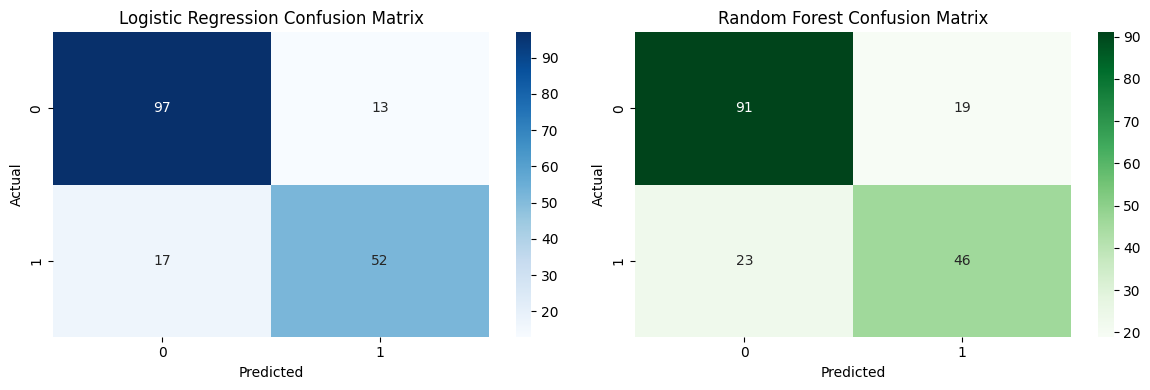

In [20]:
# 6.3 Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


3. Top 10 Feature Importance (Random Forest):
          feature  importance
2            Fare    0.271182
5     Sex_encoded    0.146434
11       Title_Mr    0.131903
3      FamilySize    0.056055
21  CabinLetter_U    0.045534
7        Pclass_3    0.041037
12      Title_Mrs    0.035069
0           SibSp    0.033886
10     Title_Miss    0.033594
9      Embarked_S    0.029556


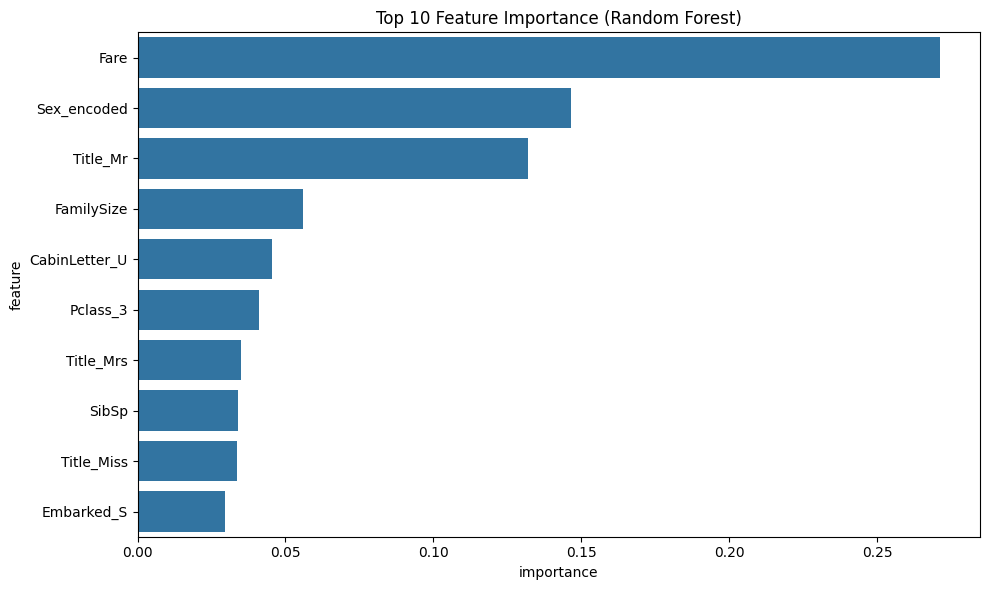

In [21]:
# 6.4 Feature Importance (Random Forest)
print("\n3. Top 10 Feature Importance (Random Forest):")
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance.head(10))

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [22]:
# 7. KESIMPULAN

print("=== KESIMPULAN EKSPERIMEN ===")
print("\n1. PREPROCESSING STEPS YANG DIBUTUHKAN:")
print("   a. Handle Missing Values:")
print("      - Age: impute dengan median berdasarkan Pclass dan Sex")
print("      - Cabin: fill dengan 'Unknown' (karena >77% missing)")
print("      - Embarked: fill dengan mode 'S'")
print("   b. Feature Engineering:")
print("      - FamilySize = SibSp + Parch + 1")
print("      - IsAlone = 1 jika FamilySize == 1")
print("      - Extract Title dari Name (Mr, Mrs, Miss, Master, Rare)")
print("      - Extract Cabin Letter dari Cabin")
print("      - Age Groups: Child, Teen, Young Adult, Adult, Senior")
print("   c. Encoding:")
print("      - Sex: Label Encoding (male=1, female=0)")
print("      - Pclass, Embarked, Title, CabinLetter, AgeGroup: One-Hot Encoding")
print("   d. Drop Columns:")
print("      - PassengerId, Name, Ticket, Cabin, Age")
print("   e. Scaling:")
print("      - StandardScaler untuk semua fitur numerik")
print("\n2. MODELING INSIGHTS:")
print("   - Random Forest outperforms Logistic Regression")
print("   - Fitur penting: Sex, Fare, Age, Pclass")
print("   - Stratified split penting karena target imbalance")
print("\n3. AUTOMATION PLAN:")
print("   - Buat fungsi preprocessing yang menerima raw dataframe")
print("   - Simpan preprocessing objects (scaler, encoders)")
print("   - Output: X_scaled, y ready untuk training")

=== KESIMPULAN EKSPERIMEN ===

1. PREPROCESSING STEPS YANG DIBUTUHKAN:
   a. Handle Missing Values:
      - Age: impute dengan median berdasarkan Pclass dan Sex
      - Cabin: fill dengan 'Unknown' (karena >77% missing)
      - Embarked: fill dengan mode 'S'
   b. Feature Engineering:
      - FamilySize = SibSp + Parch + 1
      - IsAlone = 1 jika FamilySize == 1
      - Extract Title dari Name (Mr, Mrs, Miss, Master, Rare)
      - Extract Cabin Letter dari Cabin
      - Age Groups: Child, Teen, Young Adult, Adult, Senior
   c. Encoding:
      - Sex: Label Encoding (male=1, female=0)
      - Pclass, Embarked, Title, CabinLetter, AgeGroup: One-Hot Encoding
   d. Drop Columns:
      - PassengerId, Name, Ticket, Cabin, Age
   e. Scaling:
      - StandardScaler untuk semua fitur numerik

2. MODELING INSIGHTS:
   - Random Forest outperforms Logistic Regression
   - Fitur penting: Sex, Fare, Age, Pclass
   - Stratified split penting karena target imbalance

3. AUTOMATION PLAN:
   - Buat fung

In [23]:
# Buat file cek_versi.py
import mlflow
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl

print(f"MLflow: {mlflow.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {mpl.__version__}")

MLflow: 2.19.0
Scikit-learn: 1.5.0
Pandas: 2.2.0
Numpy: 1.26.0
Matplotlib: 3.8.0
